In [1]:
import numpy as np
import scipy as sp
from functools import partial
from Tools import discretize, alokA, qnorm, RHS, Laplace
from Functionals import energyFunctionalMinimax, energyFunctionalPoisson, proportionFunctionalMin
from ApproximateGradients import energyGradientMinmax, energyGradientPoisson, proportionGradientMin
from AnalyticalGradients import energyGradientMinmax_analytical, proportionGradientMin_analytical
from OptimizationAlgorithms import DCChMinimax, gradientfunBisection, gradientfunGoldenSection


In [7]:
a = np.pi
b = np.pi
n = 128
hx = np.pi / n
hy = np.pi / n
p = 2.5

Nodes, Triangles, s1, s2, s3, s4 = discretize(a, b, hx, hy)
S12 = np.union1d(s1, s2)
S34 = np.union1d(s3, s4)
DirichletSides = np.union1d(S12, S34)

x = np.arange(0, a + hx, hx)
y = np.arange(0, b + hy, hy)

nx = len(x)
ny = len(y)
nTx = nx - 1
nTy = ny - 1
[X, Y] = np.meshgrid(x, y)

# inicializace pocatecniho nastrelu
initMat = np.sin(X) * np.sin(Y)
init = np.reshape(initMat, (nx * ny, 1), order='F')
init[DirichletSides - 1] = 0
import scipy as sp
A = alokA(Nodes, Triangles, DirichletSides)
# create csr matrix of A
A = sp.sparse.csr_matrix(A)
f = partial(energyFunctionalMinimax, p, Nodes, Triangles, DirichletSides)
# df=partial(energyGradientMinmax,p,Nodes,Triangles,DirichletSides,A)
df = partial(energyGradientMinmax, p, Nodes, Triangles, DirichletSides, A)

In [8]:
# kompilace skrze numbu (cca 15s) - jenom jednou po každém restartu kernelu
_ = f(init)
_ = df(init)
_ = qnorm(p, Nodes, Triangles, DirichletSides, init)
_ = Laplace(p, Nodes, Triangles, DirichletSides, init)
_ = RHS(p, Nodes, Triangles, DirichletSides, init)

In [9]:
xminmax, Jminmax, itminmax = DCChMinimax(p, Nodes, Triangles, DirichletSides, init, f, df, 1e-4)
print('Minimax: iterations =', itminmax, ', J=', Jminmax)


Iteration 1, J = 3.453089180813187.
Iteration 2, J = 3.4168254525038897.
Iteration 3, J = 3.415322093013992.
Iteration 4, J = 3.415252312566759.
Iteration 5, J = 3.4152478438499774.
Iteration 6, J = 3.4152474144358456.
Iteration 7, J = 3.415247349926542.
Iteration 8, J = 3.4152473372589878.
Minimax: iterations = 8 , J= 3.4152473372589878


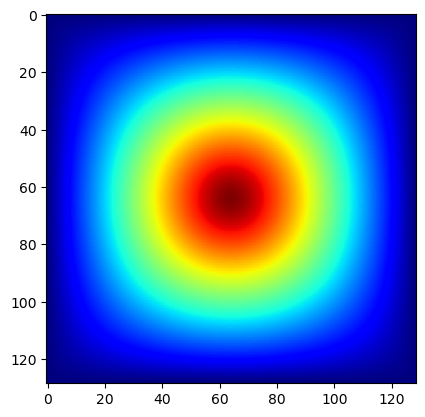

In [10]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(xminmax[:], (nx, ny), order='F'), cmap='jet')

**Pozor! tento ještě není zrychlený... (na síti n=16, trvá několik minut)**

In [5]:
f = partial(proportionFunctionalMin, p, Nodes, Triangles, DirichletSides)
df = partial(proportionGradientMin_analytical, p, Nodes, Triangles, DirichletSides, A)
xmin, Jmin, itmin = gradientfunGoldenSection(p, Nodes, Triangles, DirichletSides, init, f, df, 1e-4)

# a=qnorm(p,Nodes,Triangles,DirichletSides,xmin)**p;
# b=Lpnorm(4,Nodes,Triangles,DirichletSides,xmin);
# constant=(a/b)**(1/(4-p));
# xminScaled=xmin*constant;

print('Alternative: iterations =', itmin, ', I=', Jmin)


out 1.0331916906701795 1
out 1.6280592655182988 2
out 2.576386321976666 3
out 4.0774893028555335 4
out 6.426441883573395 5
out 10.085726096879915 6


KeyboardInterrupt: 